In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [5]:
df=pd.read_csv("Housing.csv")

In [6]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [29]:

cols_to_change = ['airconditioning', 'guestroom', 'basement', 'hotwaterheating','prefarea']  # example column names

for col in cols_to_change:
    df[col] = np.where(df[col].str.contains('no', case=False, na=False), 0, 1)


AttributeError: Can only use .str accessor with string values!

In [30]:
cols_to_change = ['mainroad']  # example column names

for col in cols_to_change:
    df[col] = np.where(df[col].str.contains('no', case=False, na=False), 0, 1)

In [31]:
df['mainroad'].value_counts()

mainroad
1    468
0     77
Name: count, dtype: int64

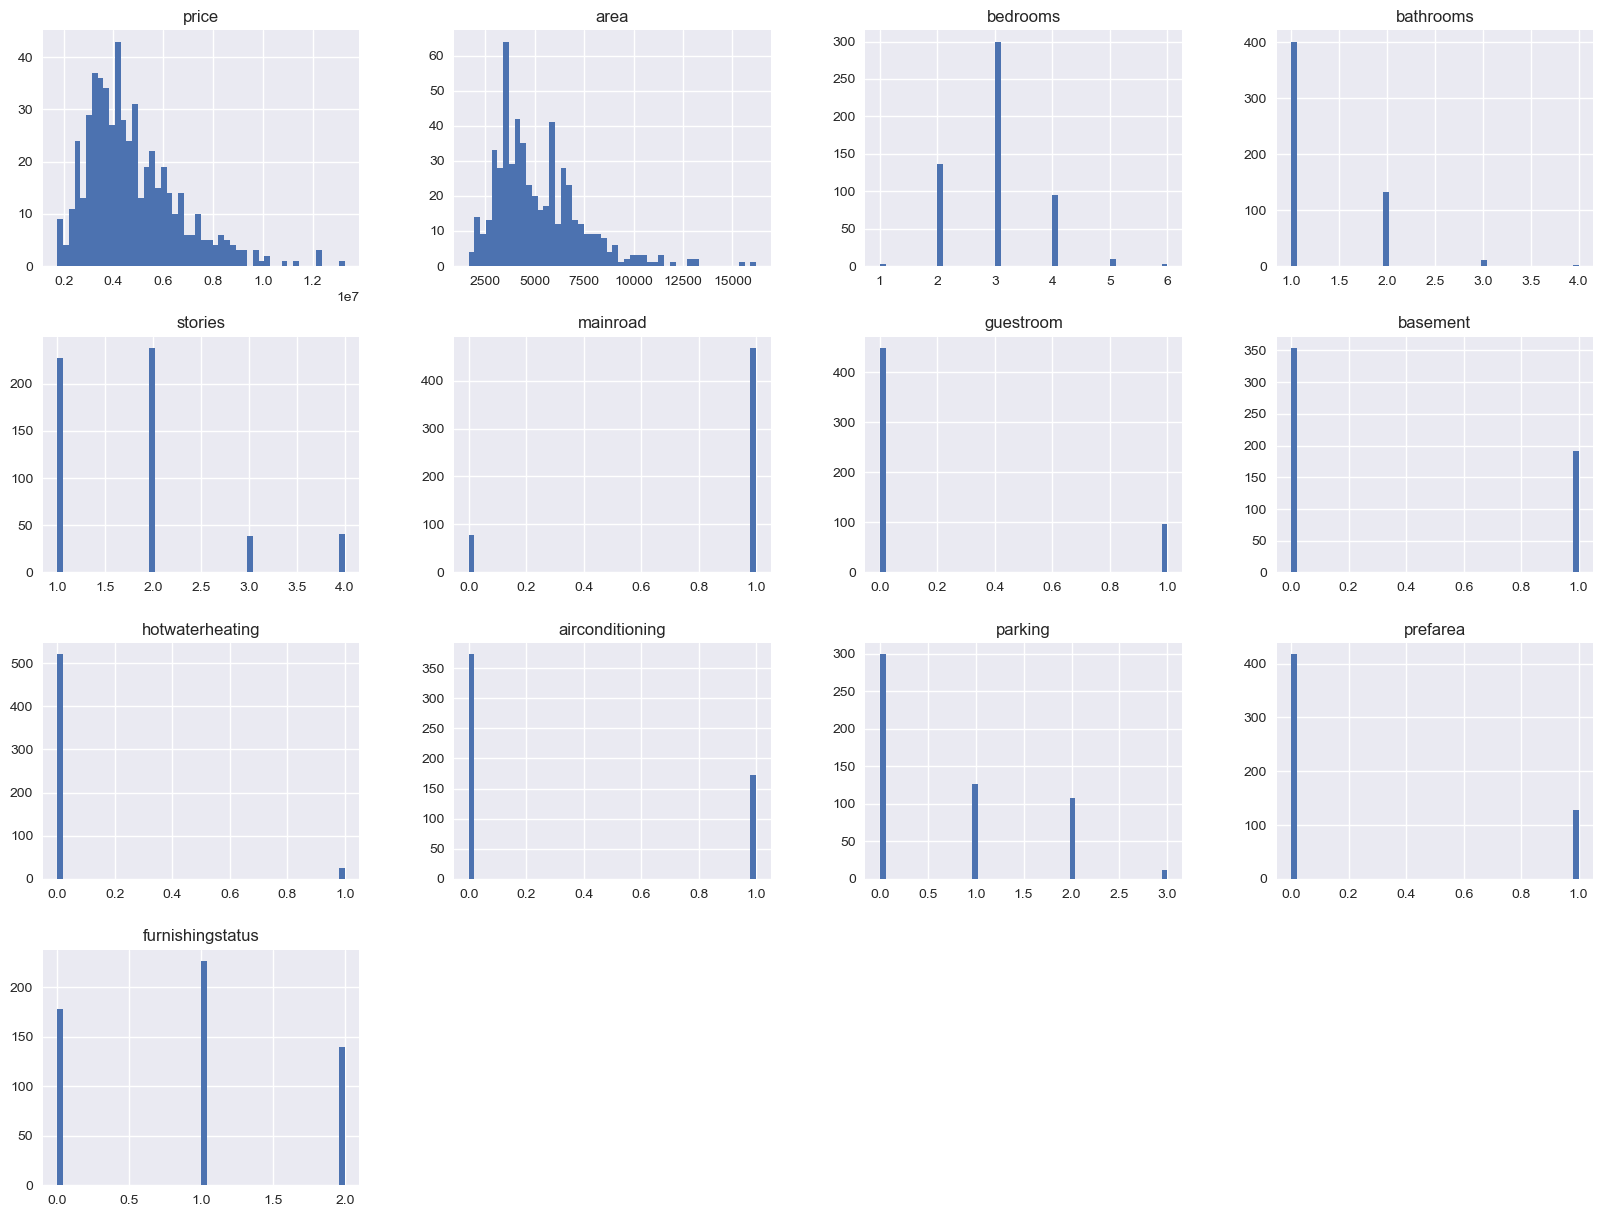

In [32]:
plt.style.use('seaborn-v0_8')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [14]:
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,yes,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,yes,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,yes,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,yes,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,no,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,yes,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,no,0,0,0,0,0,0,furnished


In [15]:
mapping_dict = {
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
}

df['furnishingstatus'] = df['furnishingstatus'].map(mapping_dict)


In [16]:
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,yes,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,yes,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,yes,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,yes,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,no,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,yes,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,no,0,0,0,0,0,0,2


In [33]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


In [34]:
df.corr()['price'].sort_values()

hotwaterheating     0.093073
basement            0.187057
guestroom           0.255517
mainroad            0.296898
furnishingstatus    0.304721
prefarea            0.329777
bedrooms            0.366494
parking             0.384394
stories             0.420712
airconditioning     0.452954
bathrooms           0.517545
area                0.535997
price               1.000000
Name: price, dtype: float64

In [ ]:
plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [35]:
df.drop(['hotwaterheating','basement','guestroom','mainroad','furnishingstatus','prefarea','bedrooms','parking',],axis=1,inplace=True)

In [36]:
df

,price,area,bathrooms,stories,airconditioning
0,13300000,7420,2,3,1
1,12250000,8960,4,4,1
2,12250000,9960,2,2,0
3,12215000,7500,2,2,1
4,11410000,7420,1,2,1
...,...,...,...,...,...
540,1820000,3000,1,1,0
541,1767150,2400,1,1,0
542,1750000,3620,1,1,0
543,1750000,2910,1,1,0


In [ ]:
df.dtypes

In [39]:
X = df[['area', 'bathrooms', 'stories', 'airconditioning']].values
y = df['price'].values.reshape(-1, 1)

In [40]:
X.shape


(545, 4)

In [41]:
y.shape

(545, 1)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std 

In [44]:
X=np.c_[np.ones((X.shape[0], 1)), X]

In [45]:
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = X.shape[0]
    theta = np.random.randn(X.shape[1], 1)
    
    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    
    return theta

In [46]:
def mean_squared_error_manual(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [47]:
theta_batch = batch_gradient_descent(X, y)

In [48]:
y_pred_batch = X.dot(theta_batch)

In [49]:
print("Batch MSE:", mean_squared_error_manual(y, y_pred_batch))

Batch MSE: 1461377519015.3044


In [50]:
def rmse_manual(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [51]:
print("Batch RMSE:", rmse_manual(y, y_pred_batch))

Batch RMSE: 1208874.4843925296


In [52]:
def online_gradient_descent(X, y, learning_rate=0.01, n_epochs=10):
    m = X.shape[0]
    theta = np.random.randn(X.shape[1], 1)

    for epoch in range(n_epochs):
        for i in range(m):
            xi = X[i:i+1]  # shape: (1, n_features)
            yi = y[i:i+1]  # shape: (1, 1)
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients

    return theta

In [53]:
theta_batch = online_gradient_descent(X, y)

In [54]:
y_pred_batch = X.dot(theta_batch)

In [55]:
print("online MSE:", mean_squared_error_manual(y, y_pred_batch))

online MSE: 4276437897155.122
